In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [145]:
comptage_velo = pd.read_csv('Accidentologie/data/comptage_velo.csv', sep=";", index_col=False, low_memory=False)
accidents = pd.read_csv('Accidentologie/data/accidents_velos_paris.csv', sep=";", index_col=False, low_memory=False)

In [5]:
accidents.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,...,lum,dep,com,agg,int,atm,col,adr,lat,long
0,201900000478,138 305 651,A01,1,1,1,1,1969.0,4,1,...,1,75,75118,2,1,1,3,RUE MARX DORMOY,"48,8881149","2,3598786"
1,201900000478,138 305 652,B01,1,1,4,2,1989.0,1,2,...,1,75,75118,2,1,1,3,RUE MARX DORMOY,"48,8881149","2,3598786"
2,201900000480,138 305 648,A01,1,1,1,1,1996.0,5,8,...,5,75,75115,2,2,1,6,RUE OLIVIER DE SERRES,"48,8361386","2,2972210"
3,201900000480,138 305 648,A01,10,3,4,1,1967.0,5,0,...,5,75,75115,2,2,1,6,RUE OLIVIER DE SERRES,"48,8361386","2,2972210"
4,201900000483,138 305 642,A01,1,1,4,2,1999.0,2,8,...,5,75,75108,2,7,1,6,PLACE SAINT AUGUSTIN,"48,8756728","2,3195863"


In [7]:
accidents.columns

Index(['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp',
       'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc',
       'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1',
       'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'vma', 'jour',
       'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int', 'atm', 'col',
       'adr', 'lat', 'long'],
      dtype='object')

In [12]:
accidents[['jour','mois', 'an', 'hrmn']]

,jour,mois,an,hrmn
0,24,10,2019,08:30
1,24,10,2019,08:30
2,24,10,2019,19:55
3,24,10,2019,19:55
4,24,10,2019,20:10
...,...,...,...,...
5598,4,1,2021,18:25
5599,4,1,2021,19:40
5600,4,1,2021,19:40
5601,2,1,2021,15:40


In [146]:
u_accidents = accidents.groupby('Num_Acc')['jour','mois', 'an', 'hrmn'].agg(['unique'])

C:\Users\arthu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [147]:
u_accidents

,jour,mois,an,hrmn
,unique,unique,unique,unique
Num_Acc,,,,
201900000478,[24],[10],[2019],[08:30]
201900000480,[24],[10],[2019],[19:55]
201900000483,[24],[10],[2019],[20:10]
201900000558,[29],[11],[2019],[19:26]
201900000669,[27],[11],[2019],[06:20]
...,...,...,...,...
202100056069,[6],[1],[2021],[16:15]
202100056184,[4],[1],[2021],[17:35]


In [148]:
total_traffic_s = comptage_velo.groupby(by='Date et heure de comptage')['Comptage horaire'].sum()

In [149]:
total_traffic = pd.DataFrame({'Date':total_traffic_s.index, 'Comptage':total_traffic_s.values})
total_traffic

,Date,Comptage
0,2019-01-01T00:00:00+01:00,136.0
1,2019-01-01T00:15:00+01:00,86.0
2,2019-01-01T00:30:00+01:00,99.0
3,2019-01-01T00:45:00+01:00,111.0
4,2019-01-01T01:00:00+01:00,110.0
...,...,...
105108,2021-12-31T22:45:00,554.0
105109,2021-12-31T23:00:00,488.0
105110,2021-12-31T23:15:00,476.0
105111,2021-12-31T23:30:00,537.0


In [150]:
for idx, row in total_traffic.iterrows():
    total_traffic.at[idx, 'Date'] = row['Date'].split('T')[0]


In [151]:
total_traffic_s = total_traffic.groupby(by='Date')['Comptage'].sum()
total_traffic_s

Date
2019-01-01    17125.0
2019-01-02    30772.0
2019-01-03    35745.0
2019-01-04    36244.0
2019-01-05    27773.0
               ...   
2021-12-27    57949.0
2021-12-28    70732.0
2021-12-29    57714.0
2021-12-30    88481.0
2021-12-31    84185.0
Name: Comptage, Length: 1096, dtype: float64

In [193]:
total_traffic = pd.DataFrame({'Date':total_traffic_s.index, 'Comptage':total_traffic_s.values})
total_traffic

,Date,Comptage
0,2019-01-01,17125.0
1,2019-01-02,30772.0
2,2019-01-03,35745.0
3,2019-01-04,36244.0
4,2019-01-05,27773.0
...,...,...
1091,2021-12-27,57949.0
1092,2021-12-28,70732.0
1093,2021-12-29,57714.0
1094,2021-12-30,88481.0


In [79]:
u_accidents.columns

MultiIndex([('jour', 'unique'),
            ('mois', 'unique'),
            (  'an', 'unique'),
            ('hrmn', 'unique')],
           )

In [194]:
for idx, row in u_accidents.iterrows():
    u_accidents.at[idx, ('hrmn', 'unique')] = f"{row['an']['unique'][0]:02}" + '-' + f"{row['mois']['unique'][0]:02}" + '-' + f"{row['jour']['unique'][0]:02}"

In [160]:
u_accidents

,jour,mois,an,hrmn
,unique,unique,unique,unique
Num_Acc,,,,
201900000478,[24],[10],[2019],2019-10-24
201900000480,[24],[10],[2019],2019-10-24
201900000483,[24],[10],[2019],2019-10-24
201900000558,[29],[11],[2019],2019-11-29
201900000669,[27],[11],[2019],2019-11-27
...,...,...,...,...
202100056069,[6],[1],[2021],2021-01-06
202100056184,[4],[1],[2021],2021-01-04


In [195]:
accidents_count = u_accidents[('hrmn', 'unique')].value_counts()

In [162]:
accidents_count

2020-10-14    13
2020-09-22    12
2020-01-13    11
2021-07-08    11
2021-06-16    11
              ..
2019-12-15     1
2019-09-15     1
2019-11-14     1
2020-11-02     1
2021-02-16     1
Name: (hrmn, unique), Length: 944, dtype: int64

In [196]:
total_accidents = pd.DataFrame({'Date':accidents_count.index, 'Comptage':accidents_count.values})

In [164]:
total_accidents

,Date,Comptage
0,2020-10-14,13
1,2020-09-22,12
2,2020-01-13,11
3,2021-07-08,11
4,2021-06-16,11
...,...,...
939,2019-12-15,1
940,2019-09-15,1
941,2019-11-14,1
942,2020-11-02,1


In [108]:
total_traffic

,Date,Comptage
0,2019-01-01,17125.0
1,2019-01-02,30772.0
2,2019-01-03,35745.0
3,2019-01-04,36244.0
4,2019-01-05,27773.0
...,...,...
1091,2021-12-27,57949.0
1092,2021-12-28,70732.0
1093,2021-12-29,57714.0
1094,2021-12-30,88481.0


In [132]:
len(total_accidents.loc[total_accidents['Date'] == '2021-12-30'])

1

In [127]:
total_traffic

,Date,Comptage
0,2019-01-01,17125.0
1,2019-01-02,30772.0
2,2019-01-03,35745.0
3,2019-01-04,36244.0
4,2019-01-05,27773.0
...,...,...
1091,2021-12-27,57949.0
1092,2021-12-28,70732.0
1093,2021-12-29,57714.0
1094,2021-12-30,88481.0


In [244]:
data = total_traffic.assign(Accidents=lambda x: 
                            total_accidents.loc[total_accidents['Date'] == str(x['Date'])]['Comptage'].iloc[0] if len(total_accidents.loc[total_accidents['Date'] == str(x['Date'])]) > 0 else 0)
        

In [166]:
data

,Date,Comptage,Accidents
0,2019-01-01,17125.0,0
1,2019-01-02,30772.0,0
2,2019-01-03,35745.0,0
3,2019-01-04,36244.0,0
4,2019-01-05,27773.0,0
...,...,...,...
1091,2021-12-27,57949.0,0
1092,2021-12-28,70732.0,0
1093,2021-12-29,57714.0,0
1094,2021-12-30,88481.0,0


In [245]:
for idx, row in data.iterrows():
    data.at[idx, 'Accidents'] = total_accidents.loc[total_accidents['Date'] == str(row['Date'])]['Comptage'].iloc[0] if len(total_accidents.loc[total_accidents['Date'] == str(row['Date'])]) > 0 else 0

In [199]:
data = data.set_index('Date')
data

,Comptage,Accidents
Date,,
2020-08-23,102277.0,4
2020-08-24,152139.0,1
2020-08-25,153444.0,4
2020-08-26,182751.0,8
2020-08-27,181728.0,2
...,...,...
2021-12-27,57949.0,0
2021-12-28,70732.0,1
2021-12-29,57714.0,0


In [200]:
data[['Comptage','Accidents']].corr()

,Comptage,Accidents
Comptage,1.00000,0.56184
Accidents,0.56184,1.00000


C:\Users\arthu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


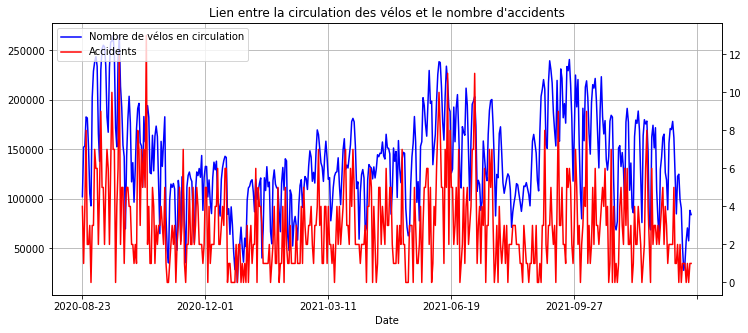

In [201]:
plt.figure(figsize=(12,5))
plt.xlabel('Lien entre accidents et le nombre de vélos')

ax1 = data.Comptage.plot(color='blue', grid=True, label='Nombre de vélos en circulation')
ax2 = data.Accidents.plot(color='red', grid=True, secondary_y=True, label='Accidents')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.title("Lien entre la circulation des vélos et le nombre d'accidents")
plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

            Comptage  Accidents
Date                           
2019-01-01   17125.0        NaN
2019-01-02   30772.0        2.0
2019-01-03   35745.0        2.0
2019-01-04   36244.0        NaN
2019-01-05   27773.0        1.0
...              ...        ...
2021-12-27   57949.0        NaN
2021-12-28   70732.0        1.0
2021-12-29   57714.0        NaN
2021-12-30   88481.0        1.0
2021-12-31   84185.0        1.0

[1096 rows x 2 columns]


C:\Users\arthu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


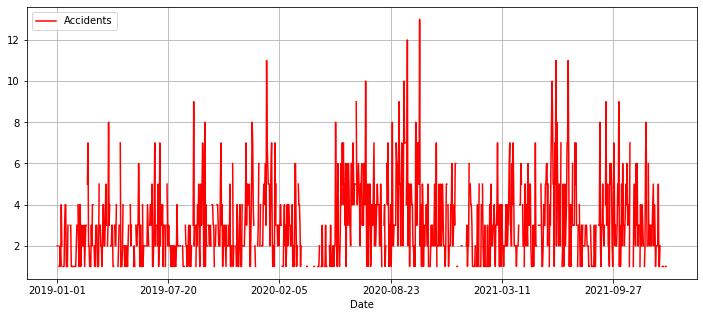

In [176]:
plt.figure(figsize=(12,5))
plt.xlabel("Nombre d'accidents")
data['Accidents'][data['Accidents'] == 0] = np.nan
print(data)
ax1 = data.Accidents.plot(color='red', grid=True, label='Accidents')
h2, l2 = ax1.get_legend_handles_labels()

plt.legend(h2, l2, loc=2)
plt.show()

In [218]:
comptage_routier = pd.read_csv('Accidentologie/data/traffic_routier.csv', sep=";", index_col=False, low_memory=False)
comptage_routier

,t_1h,q
0,2018-01-01 01:00:00,1226390
1,2018-01-01 02:00:00,1615609
2,2018-01-01 03:00:00,1635203
3,2018-01-01 04:00:00,1448058
4,2018-01-01 05:00:00,1218520
...,...,...
35052,2021-12-31 20:00:00,1457071
35053,2021-12-31 21:00:00,1375528
35054,2021-12-31 22:00:00,1147792
35055,2021-12-31 23:00:00,1062447


In [219]:
for idx, row in comptage_routier.iterrows():
    comptage_routier.at[idx, 't_1h'] = row['t_1h'].split(' ')[0]

In [204]:
comptage_routier

,t_1h,q
0,2018-01-01,1226390
1,2018-01-01,1615609
2,2018-01-01,1635203
3,2018-01-01,1448058
4,2018-01-01,1218520
...,...,...
35052,2021-12-31,1457071
35053,2021-12-31,1375528
35054,2021-12-31,1147792
35055,2021-12-31,1062447


In [220]:
total_routier = comptage_routier.groupby(by='t_1h')['q'].mean().round()
total_routier = pd.DataFrame({'Date':total_routier.index, 'Comptage':total_routier.values})
total_routier

,Date,Comptage
0,2018-01-01,1256242.0
1,2018-01-02,1379768.0
2,2018-01-03,1461698.0
3,2018-01-04,1510004.0
4,2018-01-05,1537119.0
...,...,...
1457,2021-12-28,1008127.0
1458,2021-12-29,1020246.0
1459,2021-12-30,1054518.0
1460,2021-12-31,1042148.0


In [221]:
data = data.assign(Routier=lambda x:0)
for idx, row in data.iterrows():
    data.at[idx, 'Routier'] = total_routier.loc[total_routier['Date'] == str(row['Date'])]['Comptage'].iloc[0] if len(total_routier.loc[total_routier['Date'] == str(row['Date'])]) > 0 else 0
data

,Date,Comptage,Accidents,Routier
0,2019-01-01,17125.0,0,1236915
1,2019-01-02,30772.0,2,1346205
2,2019-01-03,35745.0,2,1375193
3,2019-01-04,36244.0,0,1487144
4,2019-01-05,27773.0,1,1332689
...,...,...,...,...
1091,2021-12-27,57949.0,0,996108
1092,2021-12-28,70732.0,1,1008127
1093,2021-12-29,57714.0,0,1020246
1094,2021-12-30,88481.0,1,1054518


In [222]:
data = data.set_index('Date')

C:\Users\arthu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


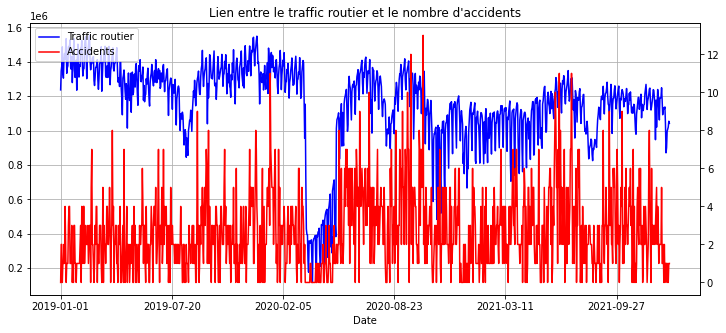

In [223]:
plt.figure(figsize=(12,5))

ax1 = data.Routier.plot(color='blue', grid=True, label='Traffic routier')
ax2 = data.Accidents.plot(color='red', grid=True, secondary_y=True, label='Accidents')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.title("Lien entre le traffic routier et le nombre d'accidents")
plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

C:\Users\arthu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


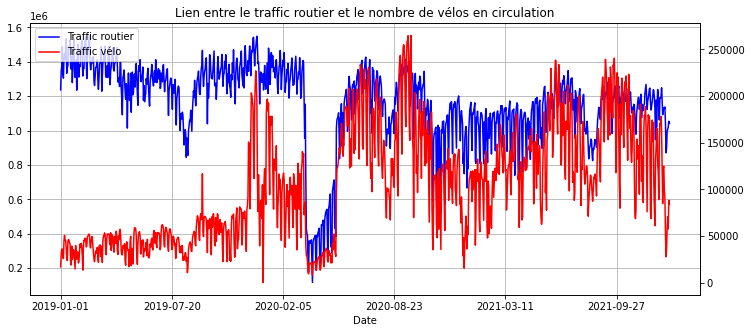

In [224]:
plt.figure(figsize=(12,5))

ax1 = data.Routier.plot(color='blue', grid=True, label='Traffic routier')
ax2 = data.Comptage.plot(color='red', grid=True, secondary_y=True, label='Traffic vélo')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.title("Lien entre le traffic routier et le nombre de vélos en circulation")
plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [238]:
data[['Comptage','Accidents', 'Routier']].corr()
data

,Comptage,Accidents,Routier
Date,,,
2019-01-01,17125.0,0,1236915
2019-01-02,30772.0,2,1346205
2019-01-03,35745.0,2,1375193
2019-01-04,36244.0,0,1487144
2019-01-05,27773.0,1,1332689
...,...,...,...
2021-12-27,57949.0,0,996108
2021-12-28,70732.0,1,1008127
2021-12-29,57714.0,0,1020246


In [243]:
data.set_index(pd.Series([i for i in range(1096)]))

,Comptage,Accidents,Routier
0,17125.0,0,1236915
1,30772.0,2,1346205
2,35745.0,2,1375193
3,36244.0,0,1487144
4,27773.0,1,1332689
...,...,...,...
1091,57949.0,0,996108
1092,70732.0,1,1008127
1093,57714.0,0,1020246
1094,88481.0,1,1054518


In [246]:
data

,Date,Comptage,Accidents
0,2019-01-01,17125.0,0
1,2019-01-02,30772.0,2
2,2019-01-03,35745.0,2
3,2019-01-04,36244.0,0
4,2019-01-05,27773.0,1
...,...,...,...
1091,2021-12-27,57949.0,0
1092,2021-12-28,70732.0,1
1093,2021-12-29,57714.0,0
1094,2021-12-30,88481.0,1


In [253]:
data.loc[:441,].mean()

Comptage     61457.520362
Accidents        2.366516
dtype: float64

In [257]:
data.loc[497:,].mean()

Comptage     142367.158598
Accidents         3.075125
dtype: float64